In [52]:
from qutip import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def oracle(x,dim):
    array = [ ]
    if x>dim:
        return("dim error: dim should greater or equal to x")
    for i in range(dim):
        if i+1==x:
            array.append([1])
        else:
            array.append([0])
    return(array)

In [4]:
def diffusor(s):
    #the input state should be ket
    sm = [ ]
    dim = s.dims[0][0]
    for i in range(dim):
        numi = s[i][0][0]
        sm.append([ ])
        for j in range(dim):
            numj = s[j][0][0]
            sm[i].append(2*np.conj(numi)*numj)
            if i == j:
                sm[i][j] = sm[i][j]-1
    return(sm)

In [5]:
#in the first register
R1 = [ ]
dim_R1 = 32
N1 = 1/np.sqrt(32)


for i in range(dim_R1):
    R1.append(Qobj(oracle(i+1,dim_R1)))

R1

[Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [

In [6]:
#in the second register
R2 = [ ]
dim_R2 = 16
N2 = 1/np.sqrt(16)


for i in range(dim_R2):
    R2.append(Qobj(oracle(i+1,dim_R2)))

R2

[Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], sha

In [7]:
s=0
for i in range(dim_R2):
    s = s + R2[i]
s = N2 * s #the grover search state which is used to construct the diffusor
s

Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
Qobj data =
[[0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]]

In [8]:
#The inverse operator
uw = [ ]
for i in range(16):
    uw.append([ ])
    for j in range(16):
        if i==j:
            if j==0:     #do the inversion on the \ket{0} state in the second register
                uw[i].append(-1)
            else:
                uw[i].append(1)
        else:
            uw[i].append(0)
u_w = tensor(qeye(32),Qobj(uw))
u_w

Quantum object: dims = [[32, 16], [32, 16]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]

In [9]:
#The diffusor
us = Qobj(diffusor(s))
u_s= tensor(qeye(32),us)
u_s

Quantum object: dims = [[32, 16], [32, 16]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[-0.875  0.125  0.125 ...  0.     0.     0.   ]
 [ 0.125 -0.875  0.125 ...  0.     0.     0.   ]
 [ 0.125  0.125 -0.875 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ... -0.875  0.125  0.125]
 [ 0.     0.     0.    ...  0.125 -0.875  0.125]
 [ 0.     0.     0.    ...  0.125  0.125 -0.875]]

In [10]:
target_set = [[0,0],[1,0],[2,0],[3,0],[4,3],[5,1],[6,12],[7,0],[8,4],[9,1],[10,1],[11,0],[12,5],[13,0],[14,2],[15,5],[16,3],[17,0]]

In [11]:
phi2 = 0.01*np.pi
dummy = [1,2,3,4,5]
result = []
plot_source1 = []
plot_source2 = []
variables = []

for g in range(5):
    result.append([ ])
    variables.append([ ])
    plot_source1.append([ ])
    plot_source2.append([ ])
    for l in range(101):

        result[g].append([ ])
        #initial the phase
        phase2 = np.exp(complex(0,l*phi2))

        #the searching state
        R12 = 0
        for i in range(16):
            for j in range(32):
                if [i,j] == target_set[i]:
                    R12 = R12 + phase2*tensor(R1[j],R2[i])
                else:
                    R12 = R12 + tensor(R1[j],R2[i])
        R12 = N1*N2*R12
        ss = R12
        #ilteration
        for i in range(dummy[g]):
            ss= u_s * u_w * ss

        #get the probabilities of states
        p1 = ss[0][0][0]* np.conj(ss[0][0][0])
        p2 = ss[1][0][0]* np.conj(ss[1][0][0])
        result[g][l].append(p1)
        result[g][l].append(p2)

    #     p=0
    #     for i in range(512):
    #         p+= ss[i][0][0]* np.conj(ss[i][0][0])
    #     if p>1:
    #         print('error')
    #         print(p)
    #         print(l)
    #         print(ss)
    #         break

        plot_source1[g].append(p1)
        plot_source2[g].append(p2)
        variables[g].append(l*0.01*np.pi)

In [12]:
plot_source1

[[(0.014770507812500009+0j),
  (0.01476698410417423+0j),
  (0.014756416456671615+0j),
  (0.0147388152989844+0j),
  (0.014714198001330201+0j),
  (0.014682588858009714+0j),
  (0.014644019063431195+0j),
  (0.01459852668132529+0j),
  (0.014546156607180779+0j),
  (0.014486960523938134+0j),
  (0.01442099685098468+0j),
  (0.014348330686501742+0j),
  (0.014269033743220548+0j),
  (0.014183184277650505+0j),
  (0.014090867012849385+0j),
  (0.013992173054811954+0j),
  (0.013887199802559338+0j),
  (0.013776050852017909+0j),
  (0.013658835893782709+0j),
  (0.013535670604865957+0j),
  (0.013406676534537901+0j),
  (0.013271980984372307+0j),
  (0.013131716882615201+0j),
  (0.01298602265300072+0j),
  (0.012835042078143628+0j),
  (0.012678924157643195+0j),
  (0.012517822961038615+0j),
  (0.012351897475760942+0j),
  (0.012181311450231738+0j),
  (0.01200623323226308+0j),
  (0.011826835602918667+0j),
  (0.011643295605999717+0j),
  (0.011455794373324137+0j),
  (0.01126451694597128+0j),
  (0.01106965209166874

In [65]:
p11 = [plot_source1[0][0], plot_source1[1][0], plot_source1[2][0], plot_source1[3][0], plot_source1[4][0]]
p22 = [plot_source2[0][0], plot_source2[1][0], plot_source2[2][0], plot_source2[3][0], plot_source2[4][0]]


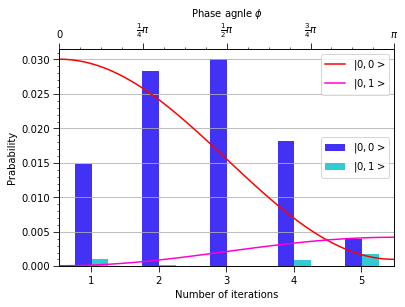

In [109]:

fig, ax_f = plt.subplots()

ax_d = ax_f.twiny()

ax_d.set_xlabel('Phase agnle $\phi$')
ax_d.set_xlim(0,np.pi)
ax_d.set_xticks([0,0.25*np.pi, 0.5*np.pi,0.75*np.pi ,np.pi])
ax_d.set_xticklabels(['0',r'$\frac{1}{4}\pi$', r'$\frac{1}{2}\pi$', r'$\frac{3}{4}\pi$', r'$\pi$'])

l1_1, = plt.plot(variables[2],plot_source1[2],color='#ff0000')
l1_2, = plt.plot(variables[2], plot_source2[2],color='#ff00d4')

ax_f.set_ylabel('Prabability')
ax_f.set_xlabel('Number of iterations')

number_of_iteration = [1,2,3,4,5]
X = np.arange(len(number_of_iteration))
rua1 =ax_f.bar(X,p11 , color = '#4232F5', width = 0.25)
rua2 =ax_f.bar(X + 0.25, p22, color = '#32CAD3', width = 0.25)
ax_f.set_xticks([i + 0.115 for i in range(5)])
ax_f.set_xticklabels(['1','2','3','4','5'])

ax_f.grid(True,'major','y')
ax_d.minorticks_on()
ax_f.tick_params(length = 6 )
ax_d.tick_params(length = 6 )

ax_d.legend([l1_1, l1_2],['$|0,0>$','$|0,1>$'])
ax_f.legend([rua1, rua2],['$|0,0>$','$|0,1>$'],loc='right')

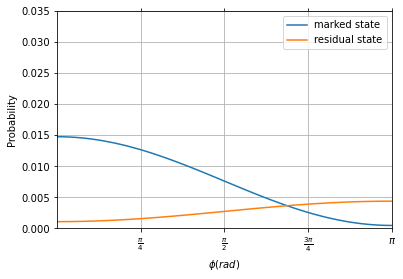

In [24]:
# l1_1, = plt.plot(variables[0],plot_source1[0])
# l1_2, = plt.plot(variables[0], plot_source2[0])
# # l2_1, = plt.plot(variables[0],plot_source1[1])
# # l2_2, = plt.plot(variables[0],plot_source2[1])
# # l3_1, = plt.plot(variables[0], plot_source1[2])
# # l3_2, = plt.plot(variables[0], plot_source2[2])
# # l4_1, = plt.plot(variables[0], plot_source1[3])
# # l4_2, = plt.plot(variables[0], plot_source2[3])
# # l5_1, = plt.plot(variables[0], plot_source1[4])
# # l5_2, = plt.plot(variables[0], plot_source2[4])

# totalDeath = [100, 200,300,400,500]
# X = np.arange(len(totalDeath))
# # plt.bar(X, p1, color = '#4232F5', width = 0.25)
# # plt.bar(X + 0.25, p2, color = '#32CAD3', width = 0.25)

# plt.legend(handles = [l1_1,l1_2],labels=['marked state','residual state'],loc='best')
# plt.axis([0,np.pi,0,0.035])
# plt.xlabel('$\phi (rad)$')
# plt.ylabel('Probability')
# plt.grid(True)

# plt.xticks([0.25*np.pi, 0.5*np.pi,0.75*np.pi ,np.pi], [r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])

# plt.tick_params(top = True, bottom = True, left = True, right=False)

# plt.show()